# HW4. SVM classification and data-driven password analysis


***You are given three different password datasets: a.txt, b.txt, and c.txt. Use the SVM package from scikit-learn (https://scikit-learn.org/stable/modules/svm.html) and python code to answer the following questions. Submit your code with a readme file that describes how to run and reproduce the results.***

Note: Passwords are said to be 3class8, if passwords are at least 8 characters long and contain at least 3-character classes (lowercase letters, uppercase letters, digits, and special characters). Also, choose the best hyper-parameters and kernel settings for your SVM to yield the best performance.

### 1. (Pre-processing) For each password, add the following 5 features (password length, number of uppercase letters, number of digits, number of special characters, and 3class8) separated by comma and rename each file into a.txt.feature, b.txt.feature, and c.txt.feature, respectively. If passwords are 3class8, then label = 1; otherwise, label = 0. Submit a.txt.feature, b.txt.feature, and c.txt.feature files.


Example:

Password, Length, Number of UpperCase, Number of Digits, Number of Special Characters, 3class8

!2QqWwee, 8, 2, 1, 1, 1

!Hihellohi!, 11, 1, 0, 2, 1

11111111, 8, 0, 8, 0, 0

12345678, 8, 0, 8, 0, 0

In [1]:
import pandas as pd
import numpy as np

data_a = pd.read_csv('./a.txt', names=['Password'])
data_b = pd.read_csv('./b.txt', names=['Password'])
data_c = pd.read_csv('./c.txt', names=['Password'])

In [2]:
data_a['Length'] = data_a['Password'].apply(lambda x : len(str(x)))
data_b['Length'] = data_b['Password'].apply(lambda x : len(str(x)))
data_c['Length'] = data_c['Password'].apply(lambda x : len(str(x)))

In [3]:
def UPPER_COUNT(x) :
    x = str(x)
    return x.count('A') + x.count('B') + x.count('C') + x.count('D') + x.count('E') + x.count('F') + x.count('G') +\
            x.count('H') + x.count('I') + x.count('J') + x.count('K') + x.count('L') + x.count('M') + x.count('N') +\
            x.count('O') + x.count('P') + x.count('Q') + x.count('R') + x.count('S') + x.count('T') + x.count('U') +\
            x.count('V') + x.count('W') + x.count('X') + x.count('Y') + x.count('Z')

In [4]:
data_a['Number of UpperCase'] = data_a['Password'].apply(lambda x : UPPER_COUNT(x))
data_b['Number of UpperCase'] = data_b['Password'].apply(lambda x : UPPER_COUNT(x))
data_c['Number of UpperCase'] = data_c['Password'].apply(lambda x : UPPER_COUNT(x))

In [5]:
import re

def Number_of_Digits(x) : 
    
    x = str(x)

    number = re.findall('\d+', x)
    
    if len(number) != 0 : 
        return len(str(max(number)))
    else : 
        return 0

In [6]:
data_a['Number of Digits'] = data_a['Password'].apply(lambda x : Number_of_Digits(x))
data_b['Number of Digits'] = data_b['Password'].apply(lambda x : Number_of_Digits(x))
data_c['Number of Digits'] = data_c['Password'].apply(lambda x : Number_of_Digits(x))

In [7]:
def Number_of_Special_Characters(x) : 
        
    x = str(x)
    
    return x.count('!') + x.count('@') + x.count('#') + x.count('$') + x.count('%') + x.count('^') + x.count('&') +\
            x.count('*') + x.count('`')

In [8]:
data_a['Number of Special Characters'] = data_a['Password'].apply(lambda x : Number_of_Special_Characters(x))
data_b['Number of Special Characters'] = data_b['Password'].apply(lambda x : Number_of_Special_Characters(x))
data_c['Number of Special Characters'] = data_c['Password'].apply(lambda x : Number_of_Special_Characters(x))

In [9]:
def class_num(x) : 
    
    class_num = 0
    
    x = str(x)
    
    if any(sym in x for sym in '!@#$%^&*`') : 
        class_num += 1
    if any(sym in x for sym in '0123456789') : 
        class_num += 1
    if any(sym in x for sym in 'abcdefghijklmnopqrstuvwxyz') : 
        class_num += 1
    if any(sym in x for sym in 'ABCDEFGHIJKLMNOPQRSTUVWXYZ') : 
        class_num += 1
        
    if class_num >= 3  and len(x) >= 8 : 
        return 1
    else : 
        return 0

In [10]:
data_a['3class8'] = data_a['Password'].apply(lambda x : class_num(x))
data_b['3class8'] = data_b['Password'].apply(lambda x : class_num(x))
data_c['3class8'] = data_c['Password'].apply(lambda x : class_num(x))

In [11]:
data_a

,Password,Length,Number of UpperCase,Number of Digits,Number of Special Characters,3class8
0,!2QqWwee,8,2,1,1,1
1,!Hihellohi!,11,1,0,2,1
2,!devilyloco19,13,0,2,1,1
3,!p1f&9stephanus{/,17,0,1,2,1
4,#7X8NY&w*B,10,4,1,3,1
...,...,...,...,...,...,...
1126,*Karlagrl**,11,1,0,3,1
1127,13.96.93.,9,0,2,0,0
1128,DARIE LUET,10,9,0,0,0
1129,L7KNDjge,8,4,1,0,1


In [12]:
data_b

,Password,Length,Number of UpperCase,Number of Digits,Number of Special Characters,3class8
0,11111111,8,0,8,0,0
1,12345678,8,0,8,0,0
2,123456aa,8,0,6,0,0
3,1234abcd,8,0,4,0,0
4,1715,4,0,4,0,0
...,...,...,...,...,...,...
2103,Millerester7,12,1,1,0,1
2104,Ilove2106,9,1,4,0,1
2105,Allahia1,8,1,1,0,1
2106,Rachel2908,10,1,4,0,1


In [13]:
data_c

,Password,Length,Number of UpperCase,Number of Digits,Number of Special Characters,3class8
0,!!sweetness!!,13,0,0,4,0
1,!1assword,9,0,1,1,1
2,!@#$1234qwer,12,0,4,4,1
3,!@#Qweasd,9,1,0,3,1
4,!@#jkl@me,9,0,0,4,0
...,...,...,...,...,...,...
2271,zebra.sock,10,0,0,0,0
2272,zoey1986,8,0,4,0,0
2273,zoeythedog1,11,0,1,0,0
2274,zurg1219,8,0,4,0,0


### 2. (Analysis) How many passwords are 3class8 in each file?

In [14]:
a = data_a['3class8'].value_counts()[1]
b = data_b['3class8'].value_counts()[1]
c = data_c['3class8'].value_counts()[1]

print('a.txt have {:,} obs' .format(a))
print('b.txt have {:,} obs' .format(b))
print('c.txt have {:,} obs' .format(c))

a.txt have 750 obs
b.txt have 1,864 obs
c.txt have 1,355 obs


### 3. (Analysis) What are the mean, median, and standard deviation for each feature in each group?

In [15]:
data_a.describe()

,Length,Number of UpperCase,Number of Digits,Number of Special Characters,3class8
count,1131.000000,1131.000000,1131.000000,1131.000000,1131.000000
mean,25.374005,2.878868,3.890363,0.785146,0.663130
std,291.686929,33.638558,3.503021,7.436861,0.472849
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,10.500000,0.000000,1.000000,0.000000,0.000000
50%,13.000000,1.000000,2.000000,0.000000,1.000000
75%,15.000000,2.000000,6.000000,1.000000,1.000000
max,7647.000000,955.000000,18.000000,185.000000,1.000000


In [16]:
data_b.describe()

,Length,Number of UpperCase,Number of Digits,Number of Special Characters,3class8
count,2108.000000,2108.000000,2108.000000,2108.000000,2108.00000
mean,9.222486,0.932638,2.658918,0.139469,0.88425
std,1.639373,0.530259,1.656811,0.932205,0.32000
min,2.000000,0.000000,0.000000,0.000000,0.00000
25%,8.000000,1.000000,1.000000,0.000000,1.00000
50%,9.000000,1.000000,2.000000,0.000000,1.00000
75%,10.000000,1.000000,4.000000,0.000000,1.00000
max,26.000000,7.000000,14.000000,23.000000,1.00000


In [17]:
data_c.describe()

,Length,Number of UpperCase,Number of Digits,Number of Special Characters,3class8
count,2276.000000,2276.000000,2276.000000,2276.000000,2276.000000
mean,9.878735,0.202548,2.518893,0.632689,0.595343
std,1.975735,0.524405,1.568955,0.674473,0.490933
min,4.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,0.000000,1.000000,0.000000,0.000000
50%,9.000000,0.000000,2.000000,1.000000,1.000000
75%,11.000000,0.000000,4.000000,1.000000,1.000000
max,20.000000,4.000000,15.000000,5.000000,1.000000


### 4. (Analysis) Plot the password length histogram for each file.

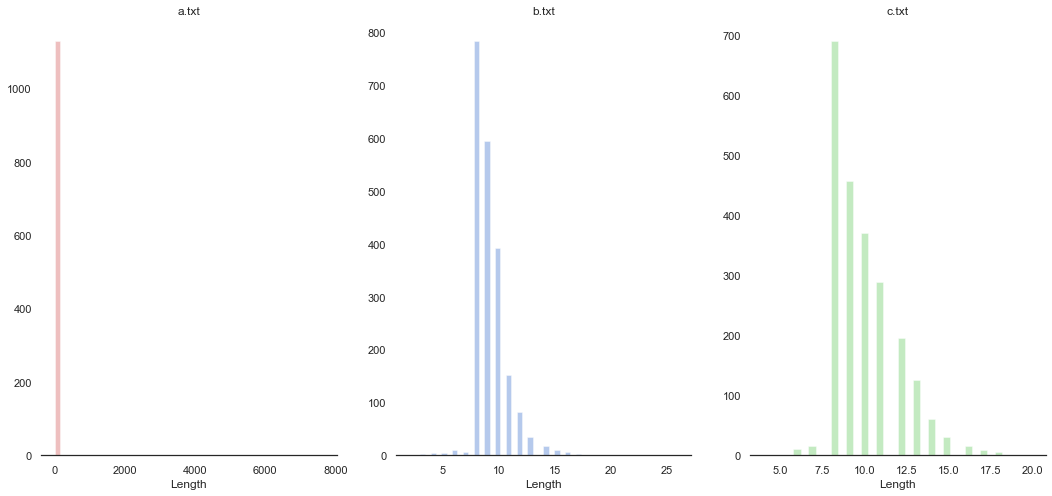

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", palette="muted", color_codes=True)

figure, ((ax1,ax2,ax3)) = plt.subplots(nrows=1, ncols=3)
figure.set_size_inches(18,8)

sns.despine(left=True)

sns.distplot(data_a['Length'], kde=False, color="r", ax=ax1, label='a.txt')
sns.distplot(data_b['Length'], kde=False, color="b", ax=ax2)
sns.distplot(data_c['Length'], kde=False, color="g", ax=ax3)

ax1.set(title='a.txt')
ax2.set(title='b.txt')
ax3.set(title='c.txt')

plt.show()

### 5. (Binary classification) From a.txt.feature and b.txt.feature, divide the first 80% for training and 20% for testing and run the SVM classifier between a.txt and b.txt. Report the precision, recall, and F1 (you may use the labels 0 and 1 to indicate the classes ‘a’ and ‘b’, respectively, i.e., ‘a’: 0 and ‘b’: 1).

In [19]:
data_a['Label'] = 1
data_b['Label'] = 0

In [20]:
train_a = data_a.loc[:0.80*len(data_a)]
train_b = data_b.loc[:0.80*len(data_b)]
test_a = data_a.loc[0.80*len(data_a):]
test_b = data_b.loc[0.80*len(data_b):]

In [21]:
train = pd.concat([train_a, train_b], axis=0)
test = pd.concat([test_a, test_b], axis=0)

In [22]:
train_X = train[['Length', 'Number of UpperCase', 'Number of Digits', 'Number of Special Characters', '3class8']]
train_Y = train[['Label']]

In [23]:
test_X = test[['Length', 'Number of UpperCase', 'Number of Digits', 'Number of Special Characters', '3class8']]
test_Y = test[['Label']]

In [24]:
from sklearn import svm
svm = svm.SVC(C=100)
svm.fit(train_X, train_Y)

c:\users\user\anaconda3\envs\tensor_2_1\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [25]:
y_true = train_Y
y_pred = svm.predict(train_X)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred)

array([[1604,   83],
       [ 326,  579]], dtype=int64)

In [26]:
import sklearn.metrics as metrics
print('Accuracy = {:.4f}' .format(metrics.accuracy_score(y_true, y_pred)))
print('Precision = {:.4f}' .format(metrics.precision_score(y_true, y_pred)))
print('Recall = {:.4f}' .format(metrics.recall_score(y_true, y_pred)))
print('F1-score = {:.4f}' .format(metrics.f1_score(y_true, y_pred)))

Accuracy = 0.8422
Precision = 0.8746
Recall = 0.6398
F1-score = 0.7390


In [27]:
y_true = test_Y
y_pred = svm.predict(test_X)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred)

array([[401,  20],
       [ 80, 146]], dtype=int64)

In [28]:
import sklearn.metrics as metrics
print('Accuracy = {:.4f}' .format(metrics.accuracy_score(y_true, y_pred)))
print('Precision = {:.4f}' .format(metrics.precision_score(y_true, y_pred)))
print('Recall = {:.4f}' .format(metrics.recall_score(y_true, y_pred)))
print('F1-score = {:.4f}' .format(metrics.f1_score(y_true, y_pred)))

Accuracy = 0.8454
Precision = 0.8795
Recall = 0.6460
F1-score = 0.7449


### 6. (Extra Credit) Among the 5 features, what are the top three most important features that influence the classification results? Explain and justify your reasoning.

In [29]:
data = pd.concat([data_a, data_b])

In [30]:
pd.pivot_table(data, index = ['Label'], values = ['Length', 'Number of UpperCase', 'Number of Digits',\
                                                  'Number of Special Characters', '3class8'], aggfunc = ['mean'], fill_value = 0)

mean                                                           \
       3class8     Length Number of Digits Number of Special Characters   
Label                                                                     
0      0.88425   9.222486         2.658918                     0.139469   
1      0.66313  25.374005         3.890363                     0.785146   

                           
      Number of UpperCase  
Label                      
0                0.932638  
1                2.878868

In [31]:
pd.pivot_table(data, index = ['Label'], values = ['Length', 'Number of UpperCase', 'Number of Digits',\
                                                  'Number of Special Characters', '3class8'], aggfunc = ['median'], fill_value = 0)

median                                                       \
      3class8 Length Number of Digits Number of Special Characters   
Label                                                                
0           1      9                2                            0   
1           1     13                2                            0   

                           
      Number of UpperCase  
Label                      
0                       1  
1                       1

In [32]:
pd.pivot_table(data, index = ['Label'], values = ['Length', 'Number of UpperCase', 'Number of Digits',\
                                                  'Number of Special Characters', '3class8'], aggfunc = ['max'], fill_value = 0)

max                                                       \
      3class8 Length Number of Digits Number of Special Characters   
Label                                                                
0           1     26               14                           23   
1           1   7647               18                          185   

                           
      Number of UpperCase  
Label                      
0                       7  
1                     955

In [33]:
pd.pivot_table(data, index = ['Label'], values = ['Length', 'Number of UpperCase', 'Number of Digits',\
                                                  'Number of Special Characters', '3class8'], aggfunc = ['min'], fill_value = 0)

min                                                       \
      3class8 Length Number of Digits Number of Special Characters   
Label                                                                
0           0      2                0                            0   
1           0      1                0                            0   

                           
      Number of UpperCase  
Label                      
0                       0  
1                       0

a와 b를 가장 잘 분류하는 feature 3개는 ***1.Length, 2.Number of Special Characters, 3. Number of UpperCase*** 라고 생각한다. 이 3개의 Feature가 레이블에 따른 평균값의 차이가 가장 크게 나기 때문이다. 따라서 레이블을 가장 잘 분류할 것이라고 생각한다.

### 7. Rerun SVM with the best three features. Report the precision, recall, and F1.

In [34]:
train_X = train[['Length', 'Number of UpperCase', 'Number of Special Characters']]
train_Y = train[['Label']]

test_X = test[['Length', 'Number of UpperCase', 'Number of Special Characters']]
test_Y = test[['Label']]

from sklearn import svm
svm = svm.SVC(C=100)
svm.fit(train_X, train_Y)

y_true = test_Y
y_pred = svm.predict(test_X)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred)

import sklearn.metrics as metrics
print('Accuracy = {:.4f}' .format(metrics.accuracy_score(y_true, y_pred)))
print('Precision = {:.4f}' .format(metrics.precision_score(y_true, y_pred)))
print('Recall = {:.4f}' .format(metrics.recall_score(y_true, y_pred)))
print('F1-score = {:.4f}' .format(metrics.f1_score(y_true, y_pred)))

Accuracy = 0.8176
Precision = 0.7967
Recall = 0.6416
F1-score = 0.7108


c:\users\user\anaconda3\envs\tensor_2_1\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### 8. (Three class classification) From a.txt.feature, b.txt.feature, and c.txt.feature, divide the first 80% for training and 20% for testing and run the SVM classifier between a.txt, b.txt, and c.txt. Report the precision, recall, and F1 (you may use the labels 0, 1, and 2 to indicate the classes ‘a’, ‘b’, and ‘c’, respectively, i.e., ‘a’: 0; ‘b’: 1; ‘c’: 2).

In [35]:
data_a['Label'] = 0
data_b['Label'] = 1
data_c['Label'] = 2

In [36]:
train_a = data_a.loc[:0.80*len(data_a)]
train_b = data_b.loc[:0.80*len(data_b)]
train_c = data_c.loc[:0.80*len(data_c)]
test_a = data_a.loc[0.80*len(data_a):]
test_b = data_b.loc[0.80*len(data_b):]
test_c = data_c.loc[0.80*len(data_c):]

In [37]:
train = pd.concat([train_a, train_b, train_c], axis=0)
test = pd.concat([test_a, test_b, train_c], axis=0)

In [38]:
train_X = train[['Length', 'Number of UpperCase', 'Number of Digits', 'Number of Special Characters', '3class8']]
train_Y = train[['Label']]

In [39]:
test_X = test[['Length', 'Number of UpperCase', 'Number of Digits', 'Number of Special Characters', '3class8']]
test_Y = test[['Label']]

In [40]:
from sklearn import svm
svm = svm.SVC(C=100)
svm.fit(train_X, train_Y)

c:\users\user\anaconda3\envs\tensor_2_1\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [41]:
y_true = train_Y
y_pred = svm.predict(train_X)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred)

array([[ 476,  206,  223],
       [  71, 1372,  244],
       [  65,  220, 1536]], dtype=int64)

In [42]:
import sklearn.metrics as metrics
print('Accuracy = {:.4f}' .format(metrics.accuracy_score(y_true, y_pred)))
print('Precision = {:.4f}' .format(metrics.precision_score(y_true, y_pred, average='macro')))
print('Recall = {:.4f}' .format(metrics.recall_score(y_true, y_pred, average='macro')))
print('F1-score = {:.4f}' .format(metrics.f1_score(y_true, y_pred, average='macro')))

Accuracy = 0.7668
Precision = 0.7692
Recall = 0.7276
F1-score = 0.7394


### 9. Rerun SVM with your best three features. Report the precision, recall, and F1.

In [43]:
train_X = train[['Length', 'Number of UpperCase', 'Number of Special Characters']]
train_Y = train[['Label']]

test_X = test[['Length', 'Number of UpperCase', 'Number of Special Characters']]
test_Y = test[['Label']]

from sklearn import svm
svm = svm.SVC(C=100)
svm.fit(train_X, train_Y)

y_true = test_Y
y_pred = svm.predict(test_X)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred)

import sklearn.metrics as metrics
print('Accuracy = {:.4f}' .format(metrics.accuracy_score(y_true, y_pred)))
print('Precision = {:.4f}' .format(metrics.precision_score(y_true, y_pred, average='macro')))
print('Recall = {:.4f}' .format(metrics.recall_score(y_true, y_pred, average='macro')))
print('F1-score = {:.4f}' .format(metrics.f1_score(y_true, y_pred, average='macro')))

c:\users\user\anaconda3\envs\tensor_2_1\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy = 0.7601
Precision = 0.6362
Recall = 0.7182
F1-score = 0.6566


### 10. (Analysis) If the three datasets are categorized according to password strength, which file belongs to the strong, medium, and weak password group and why?
(e.g: a.txt: weak, b.txt. medium, and c.txt: strong)

In [44]:
data_a['3class8'].value_counts()

1    750
0    381
Name: 3class8, dtype: int64

In [45]:
pop_a = data_a['3class8'].value_counts()[1] / (data_a['3class8'].value_counts()[0] + data_a['3class8'].value_counts()[1])
print('Group A have {:.2f}% 3class8' .format(100*pop_a))

Group a have 66.31% 3class8


In [46]:
data_b['3class8'].value_counts()

1    1864
0     244
Name: 3class8, dtype: int64

In [47]:
pop_b = data_b['3class8'].value_counts()[1] / (data_b['3class8'].value_counts()[0] + data_b['3class8'].value_counts()[1])
print('Group B have {:.2f}% 3class8' .format(100*pop_b))

Group b have 88.43% 3class8


In [48]:
data_c['3class8'].value_counts()

1    1355
0     921
Name: 3class8, dtype: int64

In [49]:
pop_c = data_c['3class8'].value_counts()[1] / (data_c['3class8'].value_counts()[0] + data_c['3class8'].value_counts()[1])
print('Group C have {:.2f}% 3class8' .format(100*pop_c))

Group c have 59.53% 3class8


가장 강력한 비밀번호 그룹은 B, 중간은 A, 가장 약한 그룹은 C라고 생각한다. 그 이유는 3clss8이면 강력한 비밀번호라고 했을 때, B는 88%가 강력한 비밀번호, C는 66%가 강력한 비밀번호, B는 66%가 강력한 비밀번호를 보유하고 있다. 따라서 강력한 순서는 ***B>A>C*** 순이다.

### 11. (Analysis) What do you think is the most important factors for creating strong multiple passwords? Describe your own strategy and reasoning.

3class8 Feature가 가장 중요한 변수라고 생각한다. 즉, 여러 class를 조합해서 만든 비밀번호가 가장 강력하다고 생각한다.

### 12. (Post-Question) Is this homework help you to improve the knowledge in password design than before? Provide your answer in 1-10 scale (1: not very helpful, 5: average, 9: very helpful). Also, explain in what aspects…

 7점. 어느순간부터 인터넷이나 핸드폰에서 회원가입을 할 때 비밀번호를 구성할 때 특수문자를 넣기 시작한 것같다. 원래는 문자와 숫자 2개의 클래스의 조합으로 만들었지만, 특수문자를 반드시 추가해서 3개의 클래스를 사용해서 비밀번호를 만들기 시작했다. 실제로 분석을 통해 문자의 길이, 숫자의 길이, 대문자의 갯수등도 중요하지만, 가장 중요한 것은 클래스의 개수라는 것을 발견했다. 여러 

 그러나, 보통 비밀번호를 지정할 때, 사람마다 자주 사용하는 고유의 숫자와 문자 등이 존재한다. 예를 들어 자신의 이름, 주민번호, 전화번호, 별명 등 자주 사용하는 패턴이 존재한다. 향후 분석에는 이런 부분도 고려한 모델을 만들면 더 좋을 것 같다.

### 13. (Post-Question) Is this homework help you to create stronger password than before? Provide your answer in 1-10 scale (1:not very helpful, 5: average, 9: very helpful) . Also, explain in what aspects…

5점. 이미 많은 사이트 등에서 영문+숫자+특수문자의 조합을 사용하여 비밀번호를 생성하게 지정해 놓았다. 이번 과제에서 왜 3개의 클래스를 사용해야 강도 높은 비밀번호인지는 깨닫게 되었지만, 어떻게 3개의 클래스를 조합해야 강력한 비밀번호인지는 다루지 않은 것 같다.

### 14. (Post-Question) Is this homework help you to improve the knowledge in SVM and classification? Provide your answer in 1-10 scale (1: not very helpful, 5: average, 9: very helpful). Also, explain in what aspects…

8점. Sklearn을 활용해서 SVM을 모델을 사용하는 법을 알게 되었다. 그러나, 하이퍼 파라미터를 찾는 방법과, 각 하이퍼 파라미터의 의미들도 함께 배웠으면 좋겠다는 생각이 들었다.

### 15. (Post-Question) Explain how this homework has helped you to create a stronger password in any way in detail?

최소 8글자 이상의 대문자+소문자+숫자+특수문자 조합으로 문자 조합과 숫자 조합은 자신과 관련되지 않은 숫자를 사용하는 것이 강력한 비밀번호를 생성할 수 있다고 생각한다.